In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import sklearn
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

Loading Dataset

In [2]:
data = pd.read_csv('discord1.csv', encoding='latin-1')
data.head()

,No,Name,Date,Profile ID,Channel,Comment,label
0,1,tarjo,17/02/22 06:58:31,#340389978255392768,valo,valo bang @here,nsara
1,2,nang,18/02/22 15:15:02,#753906860691816458,valo,besok valo,nsara
2,3,Bang Gas,18/02/22 15:15:03,#749993071202271293,valo,@nang wey kemana aja lu jawa?,sara
3,4,nang,18/02/22 15:15:14,#753906860691816458,valo,berisik banget hitam @Bang Gas,sara
4,5,nang,18/02/22 15:15:27,#753906860691816458,valo,bantuin website anjing @ShinFein,nsara


In [3]:
#Show the shape (number of rows and columns)
data.shape

(500, 7)

Menghitung jumlah SARA dan non-SARA

In [4]:
#Get columns names
data.columns

Index(['No', 'Name', 'Date', 'Profile ID', 'Channel', 'Comment', 'label'], dtype='object')

In [5]:
data.drop(['No', 'Name', 'Date', 'Profile ID', 'Channel'], axis=1, inplace=True)

In [6]:
data.head()

,Comment,label
0,valo bang @here,nsara
1,besok valo,nsara
2,@nang wey kemana aja lu jawa?,sara
3,berisik banget hitam @Bang Gas,sara
4,bantuin website anjing @ShinFein,nsara


In [7]:
data['label'].value_counts()

sara     346
nsara    154
Name: label, dtype: int64

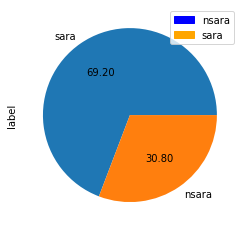

In [8]:
# Show pie plot
data['label'].value_counts().plot.pie(autopct='%.2f')
colors = {'nsara':'blue', 'sara':'orange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

In [9]:
# Convert label SARA menjadi 1 dan non-SARA menjadi 0
data['label'] = np.where(data['label']=='sara',1, 0)
data.head(10)
# new_data['label'] = np.where(new_data['label']=='sara',1, 0)
# new_data.head(10)

,Comment,label
0,valo bang @here,0
1,besok valo,0
2,@nang wey kemana aja lu jawa?,1
3,berisik banget hitam @Bang Gas,1
4,bantuin website anjing @ShinFein,0
5,@ShinFein cina bacot,1
6,itu dah gue ganti nang WKWKKW,0
7,Bocot lu jawa sini berantem sama aceh @Bang Ga...,1
8,ya BACOT BET HITAM,1
9,astaga sabar apa,0


Preprocessing

In [10]:
# Import nltk packages
import nltk
nltk.download("punkt")
nltk.download('stopwords')
import warnings
warnings.filterwarnings('ignore')
import string 
import re #regex library

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
from nltk.tokenize import word_tokenize 
def text_process(Comment):

  print('Sentence before preprocessing : \n')
  print(Comment)

#    ------ Case Folding --------
  Comment = Comment.lower()

  print('Case Folding Result : \n')
  print(Comment)

#    ------ Data Cleaning ---------
  #remove numbers
  Comment = re.sub(r"\d+", "", Comment)

  #remove hyperlinks
  Comment = re.sub(r'https:\/\/.\S+', "", Comment)

  #remove punctuation
  Comment = Comment.translate(str.maketrans("","",string.punctuation))

  #remove extra spaces
  Comment = re.sub('\s+',' ', Comment)

  #remove emojis
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  Comment = emoji_pattern.sub(r'', Comment)


  print('Data Cleaning Result : \n') 
  print(Comment)

#    ------ Tokenizing ---------

  Comment = nltk.tokenize.word_tokenize(Comment)
  print('Tokenizing Result : \n') 
  print(Comment)
  print('\n\n\n')

  return Comment

data['Comment'] = data['Comment'].apply(text_process)
data.head()

Streaming output truncated to the last 5000 lines.
tp temen lu kebanyakan seh
Tokenizing Result : 

['tp', 'temen', 'lu', 'kebanyakan', 'seh']




Sentence before preprocessing : 

Umn apalagi banyak banget wkwkwk
Case Folding Result : 

umn apalagi banyak banget wkwkwk
Data Cleaning Result : 

umn apalagi banyak banget wkwkwk
Tokenizing Result : 

['umn', 'apalagi', 'banyak', 'banget', 'wkwkwk']




Sentence before preprocessing : 

lu juga kan kuliah bareng sama rere kan
Case Folding Result : 

lu juga kan kuliah bareng sama rere kan
Data Cleaning Result : 

lu juga kan kuliah bareng sama rere kan
Tokenizing Result : 

['lu', 'juga', 'kan', 'kuliah', 'bareng', 'sama', 'rere', 'kan']




Sentence before preprocessing : 

Betul wkwkwk
Case Folding Result : 

betul wkwkwk
Data Cleaning Result : 

betul wkwkwk
Tokenizing Result : 

['betul', 'wkwkwk']




Sentence before preprocessing : 

banyak cokin wkwkwk
Case Folding Result : 

banyak cokin wkwkwk
Data Cleaning Result : 

banyak coki

,Comment,label
0,"[valo, bang, here]",0
1,"[besok, valo]",0
2,"[nang, wey, kemana, aja, lu, jawa]",1
3,"[berisik, banget, hitam, bang, gas]",1
4,"[bantuin, website, anjing, shinfein]",0


In [12]:
# ---- Remove Slangword ----

import json

with open('slangwords.json', 'r') as f:
    raw_kamus = f.read()
  
kamus_slangword = json.loads(raw_kamus)

def convertToSlangword(Comment):
    pattern = re.compile(r'\b( ' + '|'.join (kamus_slangword.keys())+r')\b') # Search pola kata (contoh kpn -> kapan)
    content = []
    for kata in Comment:
        filteredSlang = pattern.sub(lambda x: kamus_slangword[x.group()],kata) # Replace slangword berdasarkan pola review yg telah ditentukan
        content.append(filteredSlang.lower())
    Comment = content
    return Comment

data['Comment'] = data['Comment'].apply(convertToSlangword)
data.head()

,Comment,label
0,"[valo, bang, ]",0
1,"[besok, valo]",0
2,"[nang, , kemana, saja, anda, jawa]",1
3,"[berisik, sangat, hitam, bang, gas]",1
4,"[bantu, , anjing, shinfein]",0


In [13]:
# ---- Remove Stopwords ----

def stopwords_process(Comment):

  print('Before remove stopwords : \n') 
  print(Comment)

  list_stopwords = set(stopwords.words('indonesian'))
  Comment = [word for word in Comment if not word in list_stopwords]
  print('Stop Word Result : \n') 
  print(Comment)
  
  return " ".join(Comment)

data['Comment'] = data['Comment'].apply(stopwords_process)
data.head()

Before remove stopwords : 

['valo', 'bang', '']
Stop Word Result : 

['valo', 'bang', '']
Before remove stopwords : 

['besok', 'valo']
Stop Word Result : 

['besok', 'valo']
Before remove stopwords : 

['nang', '', 'kemana', 'saja', 'anda', 'jawa']
Stop Word Result : 

['nang', '', 'kemana', 'jawa']
Before remove stopwords : 

['berisik', 'sangat', 'hitam', 'bang', 'gas']
Stop Word Result : 

['berisik', 'hitam', 'bang', 'gas']
Before remove stopwords : 

['bantu', '', 'anjing', 'shinfein']
Stop Word Result : 

['bantu', '', 'anjing', 'shinfein']
Before remove stopwords : 

['shinfein', 'cina', '']
Stop Word Result : 

['shinfein', 'cina', '']
Before remove stopwords : 

['itu', '', 'saya', 'ganti', 'nang', '']
Stop Word Result : 

['', 'ganti', 'nang', '']
Before remove stopwords : 

['bocot', 'anda', 'jawa', 'sini', 'berselisih', 'sama', 'aceh', 'bang', 'gas', 'nang']
Stop Word Result : 

['bocot', 'jawa', 'berselisih', 'aceh', 'bang', 'gas', 'nang']
Before remove stopwords : 

[''

,Comment,label
0,valo bang,0
1,besok valo,0
2,nang kemana jawa,1
3,berisik hitam bang gas,1
4,bantu anjing shinfein,0


In [14]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
# ---- Stemming ----
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming_process(Comment):
  print('Before remove stemming : \n') 
  print(Comment)

  stemming = stemmer.stem(Comment)
  print('Stemming Result : \n') 
  print(stemming)
  
  return Comment

data['Comment'] = data['Comment'].apply(stemming_process)
data.head()

Before remove stemming : 

valo bang 
Stemming Result : 

valo bang
Before remove stemming : 

besok valo
Stemming Result : 

besok valo
Before remove stemming : 

nang  kemana jawa
Stemming Result : 

nang mana jawa
Before remove stemming : 

berisik hitam bang gas
Stemming Result : 

berisik hitam bang gas
Before remove stemming : 

bantu  anjing shinfein
Stemming Result : 

bantu anjing shinfein
Before remove stemming : 

shinfein cina 
Stemming Result : 

shinfein cina
Before remove stemming : 

 ganti nang 
Stemming Result : 

ganti nang
Before remove stemming : 

bocot jawa berselisih aceh bang gas nang
Stemming Result : 

bocot jawa selisih aceh bang gas nang
Before remove stemming : 

  hitam
Stemming Result : 

hitam
Before remove stemming : 

 sabar
Stemming Result : 

sabar
Before remove stemming : 

le bule
Stemming Result : 

le bule
Before remove stemming : 

 cokin
Stemming Result : 

cokin
Before remove stemming : 

bang gas  jawa 
Stemming Result : 

bang gas jawa
Befo

,Comment,label
0,valo bang,0
1,besok valo,0
2,nang kemana jawa,1
3,berisik hitam bang gas,1
4,bantu anjing shinfein,0


Pembagian Data

In [16]:
X = data['Comment']
y = data['label']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from collections import Counter
print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({1: 248, 0: 102})
Testing target statistics: Counter({1: 98, 0: 52})


In [18]:
print('rows in test set: ' + str(X_test.shape))
print('rows in train set: ' + str(X_train.shape))

rows in test set: (150,)
rows in train set: (350,)


Oversampling nsara pada data Train

In [19]:
#Menggabungkan X_train dan y_train
training_dataset = pd.concat([X_train, y_train], axis=1)
print(training_dataset)

#Menggabungkan X_test dan y_test
testing_dataset = pd.concat([X_test, y_test], axis=1)
print(testing_dataset)

                           Comment  label
141                diinjak kaki         0
383     dapet pacar orang filipin       1
135            gilaaa  orang medan      1
493       hormonnya  hasrat hilang      0
122             makan sayur berati      0
..                             ...    ...
323     laki nikah bule gol rivero      1
192   cowo cina kebanyakan ganteng      1
117                          bali       1
47         sibuk kerja anjing tiko      0
172                           cina      1

[350 rows x 2 columns]
                                 Comment  label
90                            diam ambon      1
254                  buddha  ajaran lgbt      1
283  hitungannya cina cakep  jarang muka      1
445        keinget  cina  jualan    of        1
461                            muslim         1
..                                   ...    ...
4                 bantu  anjing shinfein      0
318                                ragil      0
331         cewe dayak cakep cewe chindo

In [20]:
# ---------- Terhadap Data train ----------------
#Menggabungkan X_train dan y_train
training_dataset = pd.concat([X_train, y_train], axis=1)
print(training_dataset)

# Class count
count_class_1_train, count_class_0_train = training_dataset.label.value_counts()

# Divide by class
training_dataset_class_0 = training_dataset[training_dataset['label'] == 0]
training_dataset_class_1 = training_dataset[training_dataset['label'] == 1]

print(training_dataset_class_0)
print(training_dataset_class_1)

                           Comment  label
141                diinjak kaki         0
383     dapet pacar orang filipin       1
135            gilaaa  orang medan      1
493       hormonnya  hasrat hilang      0
122             makan sayur berati      0
..                             ...    ...
323     laki nikah bule gol rivero      1
192   cowo cina kebanyakan ganteng      1
117                          bali       1
47         sibuk kerja anjing tiko      0
172                           cina      1

[350 rows x 2 columns]
                      Comment  label
141           diinjak kaki         0
493  hormonnya  hasrat hilang      0
122        makan sayur berati      0
22                      nang       0
81                      sabar      0
..                        ...    ...
242              menyebarkan       0
9                       sabar      0
195             putih bersih       0
251               kontroversi      0
47    sibuk kerja anjing tiko      0

[102 rows x 2 columns]
    

In [21]:
# ---------- Terhadap Data test ----------------
#Menggabungkan X_test dan y_test
testing_dataset = pd.concat([X_test, y_test], axis=1)
print(testing_dataset)

# Class count
count_class_1_test, count_class_0_test = testing_dataset.label.value_counts()

# Divide by class
testing_dataset_class_0 = testing_dataset[testing_dataset['label'] == 0]
testing_dataset_class_1 = testing_dataset[testing_dataset['label'] == 1]

print(testing_dataset_class_0)
print(testing_dataset_class_1)

                                 Comment  label
90                            diam ambon      1
254                  buddha  ajaran lgbt      1
283  hitungannya cina cakep  jarang muka      1
445        keinget  cina  jualan    of        1
461                            muslim         1
..                                   ...    ...
4                 bantu  anjing shinfein      0
318                                ragil      0
331         cewe dayak cakep cewe chindo      1
245          diluar negeri jerman  legal      1
5                         shinfein cina       1

[150 rows x 2 columns]
                                 Comment  label
316                                           0
250                                           0
355             ibadah  ibadah  seminggu      0
37                       sebentar  sabar      0
366                              rivero       0
438                         bayar  mahal      0
367                            iseng  ri      0
118             

102
                                   Comment  label
383             dapet pacar orang filipin       1
135                    gilaaa  orang medan      1
68    jawa ambon  bang gas jemsbuds crispy      1
20                                   ambon      1
382              titip salam cewek filipin      1
..                                     ...    ...
385                  mudah tinggal belajar      0
94                                   nang       0
373                     kasihan haram babi      0
42                                  bantu       0
88                                    valo      0

[496 rows x 2 columns]
Random over-sampling:
1    248
0    248
Name: label, dtype: int64


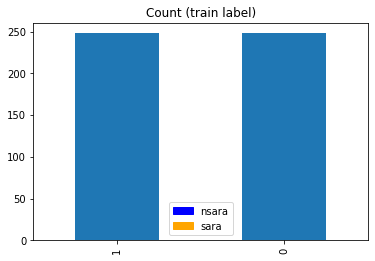

In [22]:
# Oversampling data train
training_dataset_class_0_over = training_dataset_class_0.sample(count_class_1_train, replace=True)
print(count_class_0_train)
training_dataset_train_over = pd.concat([training_dataset_class_1, training_dataset_class_0_over], axis=0)
print(training_dataset_train_over)

print('Random over-sampling:')
print(training_dataset_train_over.label.value_counts())

colors = {'nsara':'blue', 'sara':'orange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

training_dataset_train_over.label.value_counts().plot(kind='bar', title='Count (train label)');

In [23]:
# Undersampling data train
# training_dataset_class_1_under = training_dataset_class_1.sample(count_class_0_train, replace=True)
# training_dataset_train_under = pd.concat([training_dataset_class_1_under, training_dataset_class_0], axis=0)

# print('Random under-sampling:')
# print(training_dataset_train_under.label.value_counts())

# colors = {'nsara(0)':'blue', 'sara(1)':'blue'}         
# labels = list(colors.keys())
# handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
# plt.legend(handles, labels)

# training_dataset_train_under.label.value_counts().plot(kind='bar', title='Count (label)');

52
                                 Comment  label
90                            diam ambon      1
254                  buddha  ajaran lgbt      1
283  hitungannya cina cakep  jarang muka      1
445        keinget  cina  jualan    of        1
461                            muslim         1
..                                   ...    ...
271                                 cewe      0
49                         valo penjajah      0
118                           makan sapi      0
432                        yeee  anjing       0
71                              bang gas      0

[196 rows x 2 columns]
Random over-sampling:
1    98
0    98
Name: label, dtype: int64


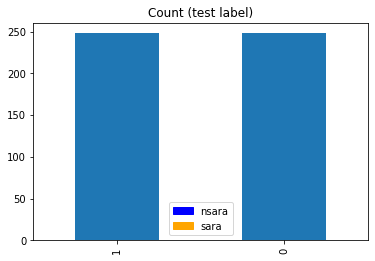

In [24]:
# Oversampling data test
testing_dataset_class_0_over = testing_dataset_class_0.sample(count_class_1_test, replace=True)
print(count_class_0_test)
testing_dataset_test_over = pd.concat([testing_dataset_class_1, testing_dataset_class_0_over], axis=0)
print(testing_dataset_test_over)

print('Random over-sampling:')
print(testing_dataset_test_over.label.value_counts())

colors = {'nsara':'blue', 'sara':'orange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

training_dataset_train_over.label.value_counts().plot(kind='bar', title='Count (test label)');

In [25]:
# Undersampling data test
# testing_dataset_class_1_under = testing_dataset_class_1.sample(count_class_0_test, replace=True)
# testing_dataset_test_under = pd.concat([testing_dataset_class_1_under, testing_dataset_class_0], axis=0)

# print('Random under-sampling:')
# print(testing_dataset_test_under.label.value_counts())

# colors = {'nsara(0)':'blue', 'sara(1)':'blue'}         
# labels = list(colors.keys())
# handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
# plt.legend(handles, labels)

# testing_dataset_test_under.label.value_counts().plot(kind='bar', title='Count (label)');

In [26]:
# Data train
training_dataset_train_over

y_train_over = training_dataset_train_over.pop('label')
X_train_over = training_dataset_train_over.pop('Comment')

print(X_train_over)

383               dapet pacar orang filipin 
135                      gilaaa  orang medan
68      jawa ambon  bang gas jemsbuds crispy
20                                     ambon
382                titip salam cewek filipin
                       ...                  
385                    mudah tinggal belajar
94                                     nang 
373                       kasihan haram babi
42                                    bantu 
88                                      valo
Name: Comment, Length: 496, dtype: object


In [27]:
# Data test
testing_dataset_test_over

y_test_over = testing_dataset_test_over.pop('label')
X_test_over = testing_dataset_test_over.pop('Comment')

print(X_test_over)

90                              diam ambon
254                    buddha  ajaran lgbt
283    hitungannya cina cakep  jarang muka
445          keinget  cina  jualan    of  
461                              muslim   
                      ...                 
271                                   cewe
49                           valo penjajah
118                             makan sapi
432                          yeee  anjing 
71                                bang gas
Name: Comment, Length: 196, dtype: object


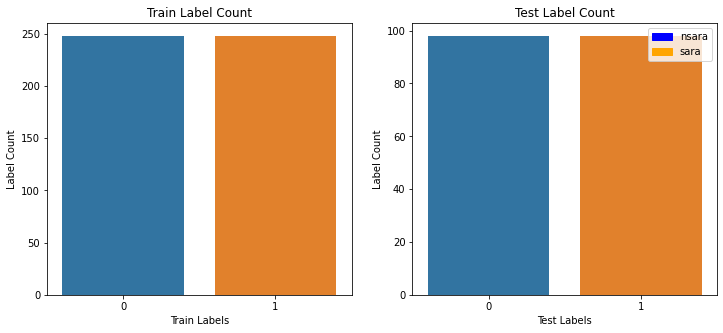

In [28]:
from typing_extensions import final
fig, ax = plt.subplots(1,2, figsize=(12,5))
for idx, group in enumerate([('Train', y_train_over), ('Test', y_test_over)]):
    data = group[1].value_counts()
    sns.barplot(ax=ax[idx], x=data.index, y=data.values)
    
    ax[idx].set_title(f'{group[0]} Label Count')
    ax[idx].set_xlabel(f'{group[0]} Labels')
    ax[idx].set_ylabel('Label Count')

    colors = {'nsara':'blue', 'sara':'orange'}         
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
    plt.legend(handles, labels)
plt.show()

In [29]:
# Ekstraksi ke dalam vektor dengan TFIDF
# vectorizer = TfidfVectorizer()
# X_train = vectorizer.fit_transform(X_train)

In [30]:
# Ekstraksi dengan count vectorizer
vectorizer = CountVectorizer()
X_train_final = vectorizer.fit_transform(X_train_over)

In [31]:
print(X_train_final)

  (0, 85)	1
  (0, 283)	1
  (0, 280)	1
  (0, 117)	1
  (1, 280)	1
  (1, 135)	1
  (1, 236)	1
  (2, 169)	1
  (2, 7)	1
  (2, 26)	1
  (2, 127)	1
  (2, 170)	1
  (2, 83)	1
  (3, 7)	1
  (4, 117)	1
  (4, 366)	1
  (4, 319)	1
  (4, 74)	1
  (5, 169)	1
  (5, 257)	1
  (5, 64)	1
  (5, 341)	1
  (6, 353)	1
  (6, 303)	1
  (6, 147)	1
  :	:
  (482, 229)	1
  (482, 108)	1
  (482, 154)	1
  (484, 280)	1
  (484, 345)	1
  (484, 10)	1
  (484, 168)	1
  (485, 377)	1
  (485, 223)	1
  (485, 322)	1
  (485, 15)	1
  (488, 70)	1
  (488, 223)	1
  (488, 342)	1
  (489, 289)	1
  (490, 66)	1
  (491, 39)	1
  (491, 365)	1
  (491, 250)	1
  (492, 258)	1
  (493, 17)	1
  (493, 180)	1
  (493, 141)	1
  (494, 29)	1
  (495, 379)	1


In [32]:
# #Naive Bayes
classifier = MultinomialNB()
classifier.fit(X_train_final, y_train_over)

MultinomialNB()

In [33]:
# Uji dengan data test
X_test_over = vectorizer.transform(X_test_over)
y_pred = classifier.predict(X_test_over)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0
 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0
 0 1 0 0 0 1 1 0 0 0 1]


In [34]:
# Uji dengan sembarang data
def find(x):
    if x == 1:
        print ("Message is SARA")
    else:
        print ("Message is NOT SARA")
newtext = ["orang jawa"]
integers = vectorizer.transform(newtext)
x = classifier.predict(integers)
find(x)

Message is SARA


In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test_over, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.65      0.75        98
           1       0.73      0.92      0.81        98

    accuracy                           0.79       196
   macro avg       0.81      0.79      0.78       196
weighted avg       0.81      0.79      0.78       196



In [36]:
# Print Confusion Matrix.
cm = confusion_matrix(y_test_over, y_pred)
print(cm)

[[64 34]
 [ 8 90]]


In [37]:
# Print accuracy, precision, and recall.
print("Accuracy:", accuracy_score(y_test_over, y_pred)*100)

Accuracy: 78.57142857142857


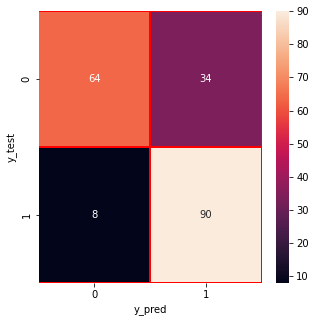

In [38]:
confusionmatrix = confusion_matrix(y_test_over, y_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(confusionmatrix,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")

plt.show()